In [16]:
import os
import copy 

import matplotlib.pyplot as plt
import numpy as np

from General.Analysis import Analyzer
from General.Data_handling import import_hdf5, drive_letter
from General.Data_handling.Import import DataSet

plt.rcParams['figure.dpi'] = 100

base_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration'
image_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\NO3 pH'
dependent = 'pH'
variable_name = 'pH'
data = import_hdf5(os.path.join(base_loc, r'NO3 pH\data.hdf5'), dependent)

variable_factor = 1
wavelength_range = [180, 450]
r2_values = [0.99, 1]
wavelength_plot_every = 5
plot_measurement_num = 2
baseline_correction = [450, 500]

if not os.path.exists(image_loc):
    os.makedirs(image_loc)

analyzer = Analyzer.from_DataSet(DataSet.from_simple(data, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

data2 = copy.deepcopy(data[data.measurement_num==plot_measurement_num])
for var in np.unique(data2.variable):
    data2.absorbances[data2.variable==var] = data2.absorbances[data2.variable==var] - data2.absorbances[data2.variable==np.max(data2.variable)]

analyzer2 = Analyzer.from_DataSet(DataSet.from_simple(data2, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

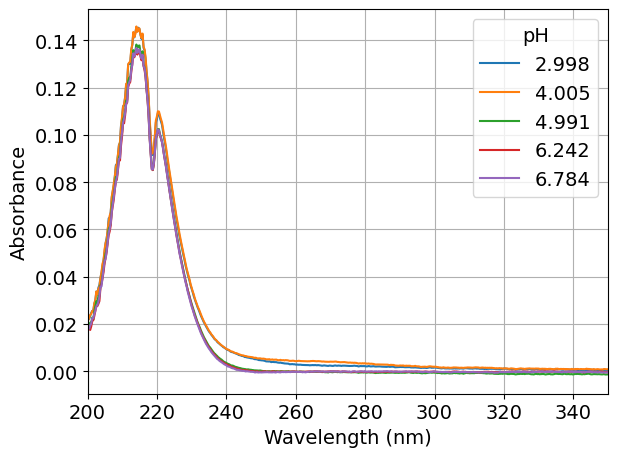

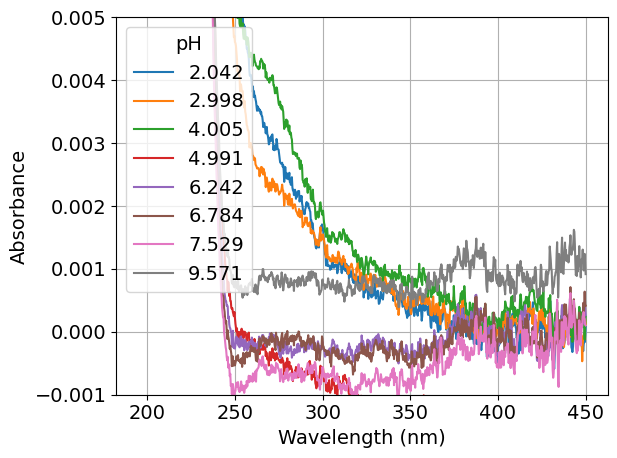

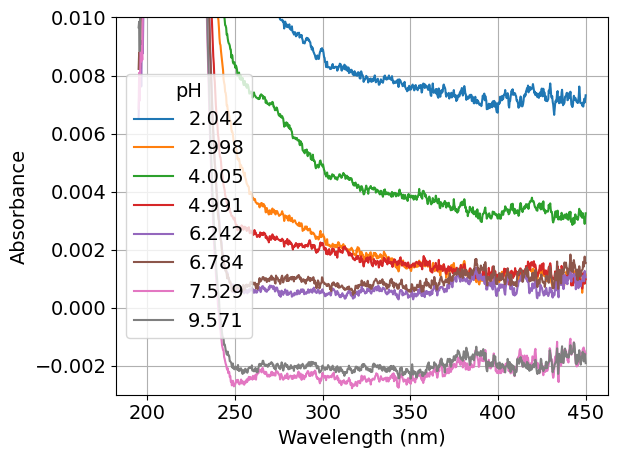

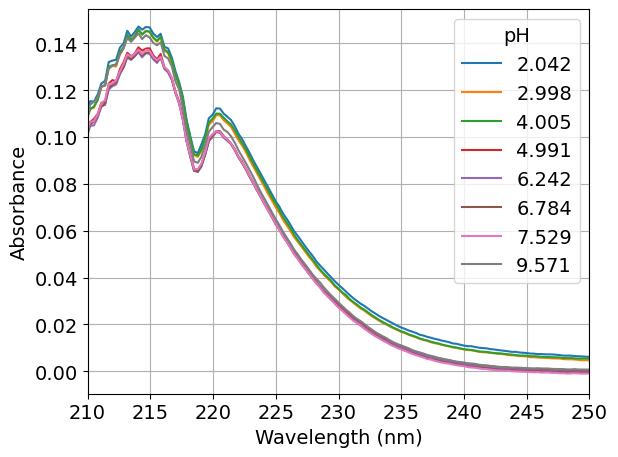

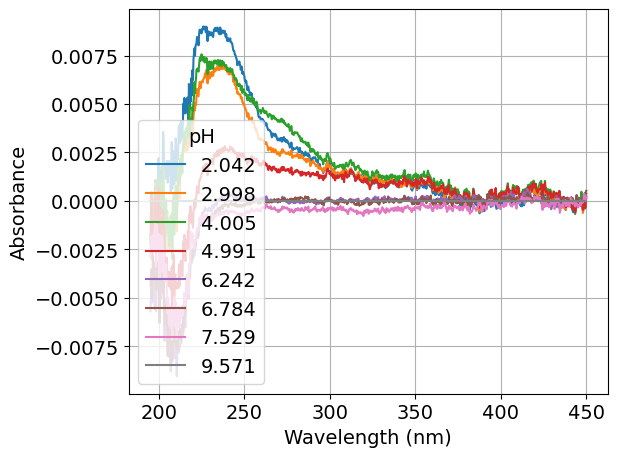

In [17]:
image_loc = r'C:\Users\20222772\Downloads'
analyzer.absorbance_vs_wavelength_with_variable(save_loc=image_loc, show=False, variable_range=(2.1, 7),
                                                plot_kwargs={'xlim': [200, 350]}, save_suffix='.png',
                                                close=False)
plt.savefig(os.path.join(image_loc, 'NO3 pH.png'), dpi=500)
plt.show()

analyzer.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' zoom', plot_kwargs={'ylim': [-0.001, 0.005]}, show=True)
plt.show()

analyzer.absorbance_vs_wavelength_with_variable(corrected=False, save_loc=image_loc, save_suffix=' zoom uncorr', plot_kwargs={'ylim': [-0.003, 0.01]}, show=True)
plt.show()

analyzer.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' zoom 2', plot_kwargs={'xlim': [210, 250]}, show=True)
plt.show()

analyzer2.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix='relative', show=True)
plt.show()

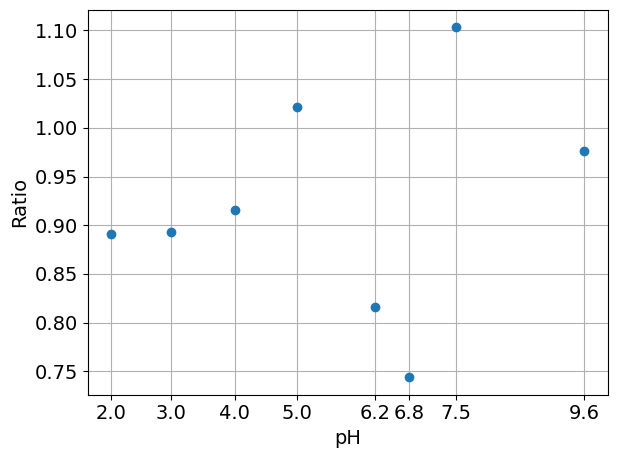

In [18]:
ranges1 = [(344, 348), (356, 360), (370, 374), (384, 388)]
ranges2 = [(350, 354), (363, 367), (377, 381)]

analyzer.wavelength_range_ratio_vs_variable(ranges1, ranges2)
